In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Jag har valt att arbeta med ett titanic-dataset! Det skiljer sig lite från de flesta andra dataset från titanic som jag sett på
kaggle, för detta innehåller även besättningen, inte bara passagerarna.

In [231]:
titanic = pd.read_csv('titanic.csv')

DATA PROCESSING / EDA

Vi börjar med att titta på datan med info, shape, describe osv.

In [232]:
titanic.head(10)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0.0,0.0,no
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0.0,2.0,no
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,1.0,1.0,no
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1.0,1.0,yes
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,0.0,0.0,yes
5,"Abelseth, Mr. Olaus Jørgensen",male,25.0,3rd,S,United States,348122.0,7.1300,0.0,0.0,yes
6,"Abelson, Mr. Samuel",male,30.0,2nd,C,France,3381.0,24.0000,1.0,0.0,no
7,"Abelson, Mrs. Hannah",female,28.0,2nd,C,France,3381.0,24.0000,1.0,0.0,yes
8,"Abī-Al-Munà, Mr. Nāsīf Qāsim",male,27.0,3rd,C,Lebanon,2699.0,18.1509,0.0,0.0,yes
9,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,3rd,S,Finland,3101284.0,7.1806,0.0,0.0,yes


In [233]:
titanic.shape

(2207, 11)

In [234]:
titanic.describe()

,age,ticketno,fare,sibsp,parch
count,2205.000000,1.316000e+03,1291.000000,1307.000000,1307.000000
mean,30.444444,2.842157e+05,33.404760,0.499617,0.385616
std,12.151764,6.334726e+05,52.227592,1.042273,0.866092
min,0.166667,2.000000e+00,3.030500,0.000000,0.000000
25%,22.000000,1.426225e+04,7.180600,0.000000,0.000000
50%,29.000000,1.114265e+05,14.090200,0.000000,0.000000
75%,38.000000,3.470770e+05,31.060750,1.000000,0.000000
max,74.000000,3.101317e+06,512.060700,8.000000,9.000000


In [235]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2207 non-null   object 
 1   gender    2207 non-null   object 
 2   age       2205 non-null   float64
 3   class     2207 non-null   object 
 4   embarked  2207 non-null   object 
 5   country   2126 non-null   object 
 6   ticketno  1316 non-null   float64
 7   fare      1291 non-null   float64
 8   sibsp     1307 non-null   float64
 9   parch     1307 non-null   float64
 10  survived  2207 non-null   object 
dtypes: float64(5), object(6)
memory usage: 189.8+ KB


Nedan syns alla länder som passagerarna kom från, många fler än vad jag trodde!

In [236]:
titanic['country'].unique()

array(['United States', 'England', 'Norway', 'France', 'Lebanon',
       'Finland', 'Sweden', 'Argentina', 'Canada', 'Denmark',
       'Northern Ireland', 'Bulgaria', 'Switzerland', 'Channel Islands',
       'Bosnia', 'Hungary', nan, 'Ireland', 'Italy', 'India', 'Wales',
       'South Africa', 'Croatia (Modern)', 'Scotland', 'Siam', 'Uruguay',
       'Belgium', 'Poland', 'Australia', 'Peru', 'Spain', 'Egypt',
       'Japan', 'Syria', 'Russia', 'Slovenia', 'Greece', 'Turkey',
       'China/Hong Kong', 'Austria', 'Latvia', 'Yugoslavia',
       'Slovakia (Modern day)', 'Germany', 'Croatia', 'Cuba',
       'Netherlands', 'Mexico', 'Guyana'], dtype=object)

Ganska många null-värden, det kan ställa till det lite! jag misstänker att de flesta tillhör besättningen, pga det finns många tomma i fare och ticketno

In [237]:
titanic.isnull().sum()

name          0
gender        0
age           2
class         0
embarked      0
country      81
ticketno    891
fare        916
sibsp       900
parch       900
survived      0
dtype: int64

Fler män än kvinnor fanns ombord.

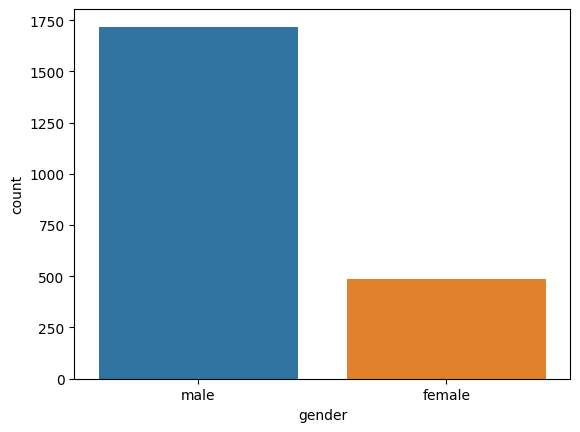

In [238]:
sns.countplot(x = 'gender', data = titanic)
plt.show()

Här försöker jag plotta vilken passagerarklass alla tillhör, men det ser inte så bra ut eftersom det även finns besättning under flera olika kategorier.

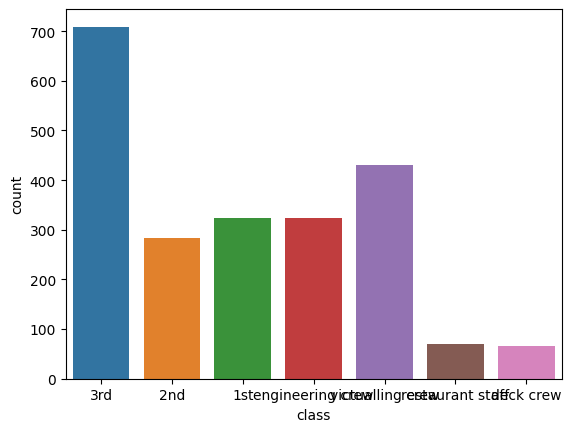

In [239]:
sns.countplot(x = 'class', data = titanic)
plt.show()

In [240]:
titanic['class'].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

Jag skapar en ny dataframe (titanic2) där jag ändrar om de olika personal-värdena till en gemensam, då ser plotten mycket bättre ut!
Nu ser man tydligare hur mycket personal som fanns ombord. För övrigt verkar det finnas flest passagerare i tredje klass och nästan lika många i första och andra.

In [241]:
titanic2 = titanic.replace(['engineering crew', 'victualling crew', 'restaurant staff', 'deck crew'], 'crew')

<Axes: xlabel='class', ylabel='count'>

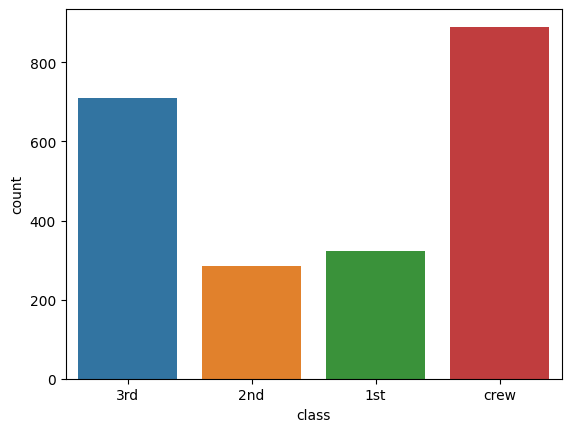

In [242]:
sns.countplot(x = 'class', data = titanic2)

Som vi såg tidigare fanns det ett fåtal null-värden som jag väljer att ersätta med medelvärdet.
Även bland biljettpriset fanns en hel del null-värden, som verkar tillhöra personalen på båten, som inte betalar något biljettpris. jag fyller även dessa med medelvärdet just nu, jag får se sen om detta är en bra idé eftersom det är så många
i personalen.

In [243]:
titanic2['age'].fillna(titanic2['age'].mean(), inplace = True)

In [244]:
titanic2['fare'].fillna(titanic2['fare'].mean(), inplace = True)

In [245]:
titanic2['ticketno'].fillna(titanic2['ticketno'].mean(), inplace = True)

In [246]:
titanic2.tail(20)

,name,gender,age,class,embarked,country,ticketno,fare,sibsp,parch,survived
2187,"Witcher, Mr. Albert Ernest",male,39.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2188,"Witter, Mr. James William Cheetham",male,31.0,crew,S,England,284215.677052,33.40476,NaN,NaN,yes
2189,"Wittman, Mr. Henry",male,39.0,crew,S,Austria,284215.677052,33.40476,NaN,NaN,no
2190,"Witt, Mr. Henry Dennis",male,37.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2191,"Witts, Mr. William Francis",male,35.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2192,"Woodford, Mr. Frederick Ernest",male,40.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2193,"Wood, Mr. Henry",male,31.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2194,"Wood, Mr. James Thomas",male,49.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no
2195,"Woody, Mr. Oscar Scott",male,41.0,crew,S,United States,284215.677052,33.40476,NaN,NaN,no
2196,"Wormald, Mr. Henry Frederick Charles",male,45.0,crew,S,England,284215.677052,33.40476,NaN,NaN,no


Passagerare vars hemland är okänt får tillhöra det fiktiva landet Unknown!

In [247]:
titanic2['country'].fillna('Unknown', inplace = True)

In [248]:
titanic2.value_counts('country')

country
England                  1125
United States             264
Ireland                   137
Sweden                    105
Unknown                    81
Lebanon                    71
Finland                    54
Scotland                   36
Canada                     34
France                     26
Norway                     26
Belgium                    22
Northern Ireland           21
Wales                      20
Bulgaria                   19
Switzerland                18
Channel Islands            17
Croatia (Modern)           12
Croatia                    11
Italy                      11
Spain                       9
India                       8
Argentina                   7
Hungary                     7
Denmark                     7
Turkey                      6
Germany                     6
South Africa                6
Australia                   5
Bosnia                      4
Slovenia                    4
Austria                     3
Poland                      3
Si

Inte den snyggaste plotten kanske men den verkar rimlig. det röda sträcket är såklart personalen som alla fick betala samma pris.

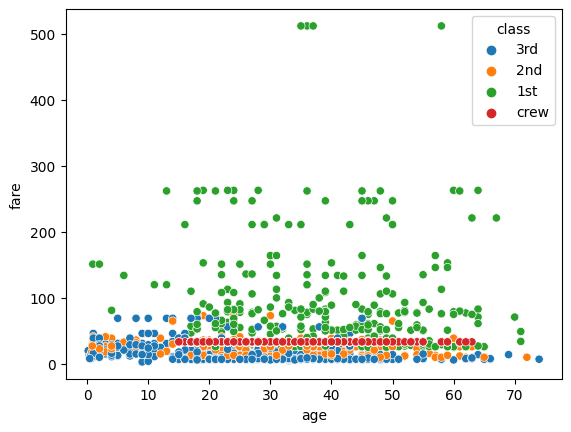

In [249]:
sns.scatterplot(x='age', y='fare', hue='class', data=titanic2)
plt.show()

Klassisk pairplot. Här kan man redan nu notera att besättningen som jag har manipulerat värdena på syns rätt tydligt i flera plottar och kommer troligtvis få en ganska stor påverkan.

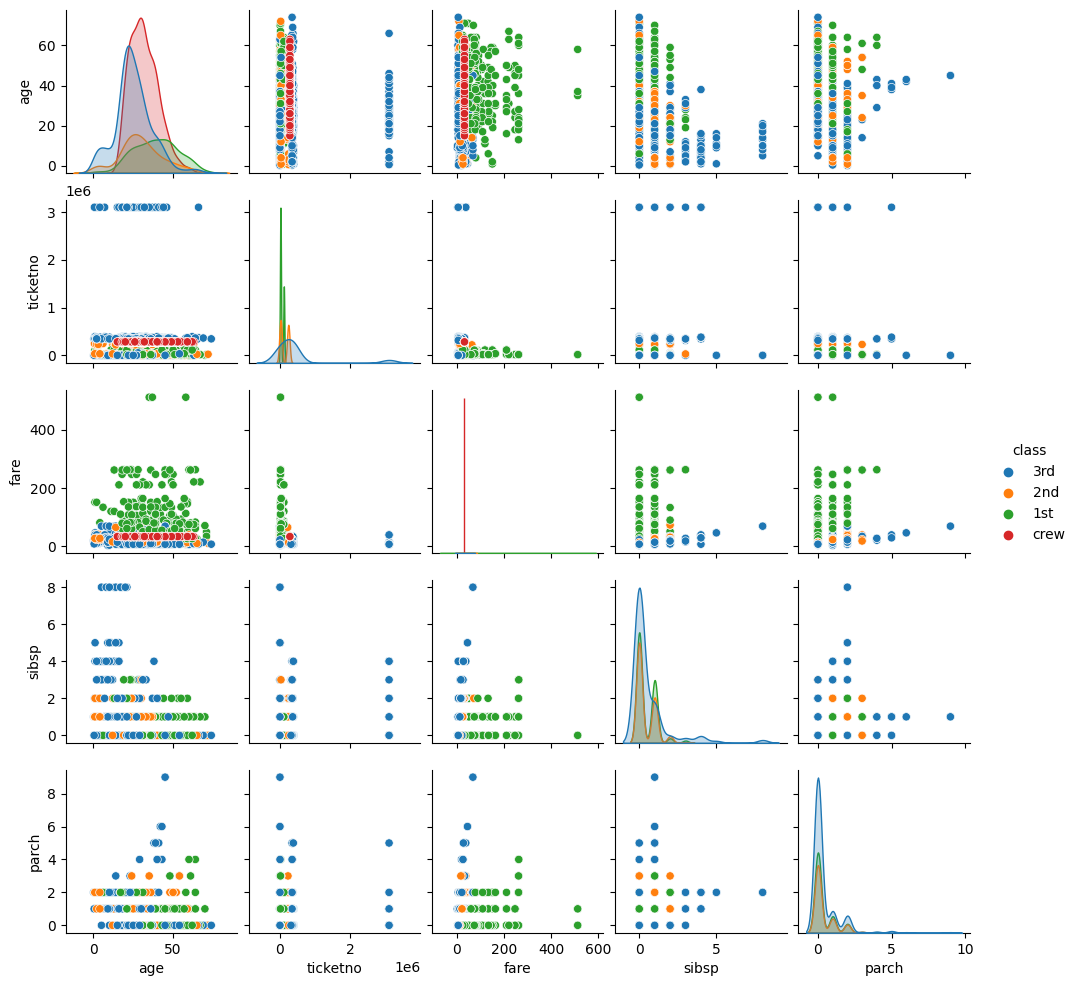

In [250]:
sns.pairplot(titanic2, hue = 'class', height = 2)
plt.show()

https://pbpython.com/categorical-encoding.html

Kategorierna kön och om man överlevde är viktiga så jag gör om dessa till kategorier(1 = man, 0= kvinna, 1 = överlevde, 0 = överlevde ej) med s.k. label encoding.

In [251]:
titanic2['survived'] = titanic2['survived'].astype('category')

titanic2['survived'] = titanic2['survived'].cat.codes

In [252]:
titanic2['gender'] = titanic2['gender'].astype('category')

titanic2['gender'] = titanic2['gender'].cat.codes

Här testar jag en heatmap och noterar att passagerarklass inte syns eftersom denna feature är av typen object.
Eftersom den känns viktig gör jag om denna till siffror. jag passar även på att snygga till övriga features innan jag undersöker vidare.

In [253]:
corr = titanic2.corr(method='pearson')

C:\Users\fredd\AppData\Local\Temp\ipykernel_4700\2211968440.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic2.corr(method='pearson')


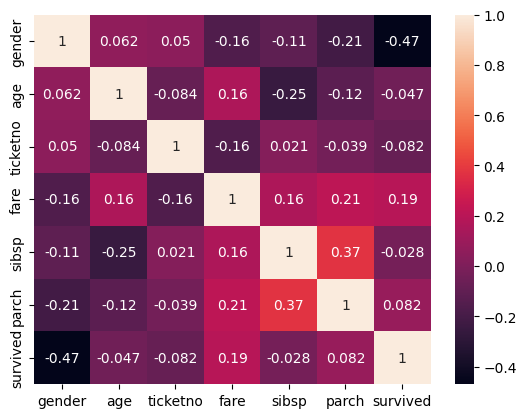

In [254]:
sns.heatmap(corr,annot=True)
plt.show()

In [255]:
Class = {'crew': 0, '1st':1, '2nd':2, '3rd':3}

titanic2['class'] = titanic2['class'].replace(Class)

Jag antar även att vissa kategorier inte är viktiga för att veta om man överlevde eller inte så jag droppar även dessa nu.
De som jag anser vara oviktiga är Namn, biljettnr, och i vilken stad man klev på.

OBS! jag ångrade mig sedan på ticketno och embarked, så jag kommenterade ut dessa. Namnet bedömde jag som att förvisso kanske var viktigt, men man bör ju kunna få ut ungefär samma typ av information från det som från andra features, som exempelvis gender.

In [256]:
#titanic2.drop('embarked', axis = 1, inplace = True)
#titanic2.drop('ticketno', axis = 1, inplace = True)
titanic2.drop('name', axis=1, inplace = True)

Jag gör även labels på embarked och country, även om det blir svårt att veta vilket land som tillhör vilken siffra 

In [257]:
titanic2['country'] = titanic2['country'].astype('category')
titanic2['country'] = titanic2['country'].cat.codes

titanic2['embarked'] = titanic2['embarked'].astype('category')
titanic2['embarked'] = titanic2['embarked'].cat.codes

Gällande kategorierna sibsp (sibling/spouse) och parch (parent/child) så verkar de flesta av null-värdena tillhöra besättningen,
så jag väljer att anta att siffran 0 stämmer in på de allra flesta.

In [258]:
titanic2['sibsp'].fillna(0, inplace = True)
titanic2['parch'].fillna(0, inplace = True)

In [259]:
corr = titanic2.corr(method='pearson')

Nu när jag har snyggat till datan lite: mer plots!!

Den starkaste korrelationen verkar vara kön! i örigt är det inte någon som verkar sticka ut så mycket, vad jag kan se.

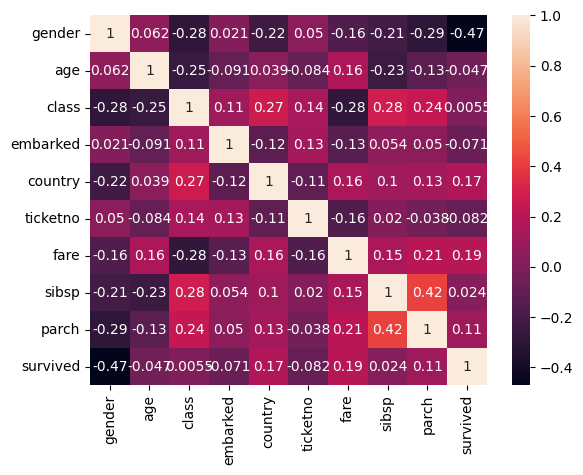

In [260]:
sns.heatmap(corr, annot=True)
plt.show()

0 = överevde ej, 1=överlevde. Män i äldre ålder som reste med familj verkade ligga risigt till.

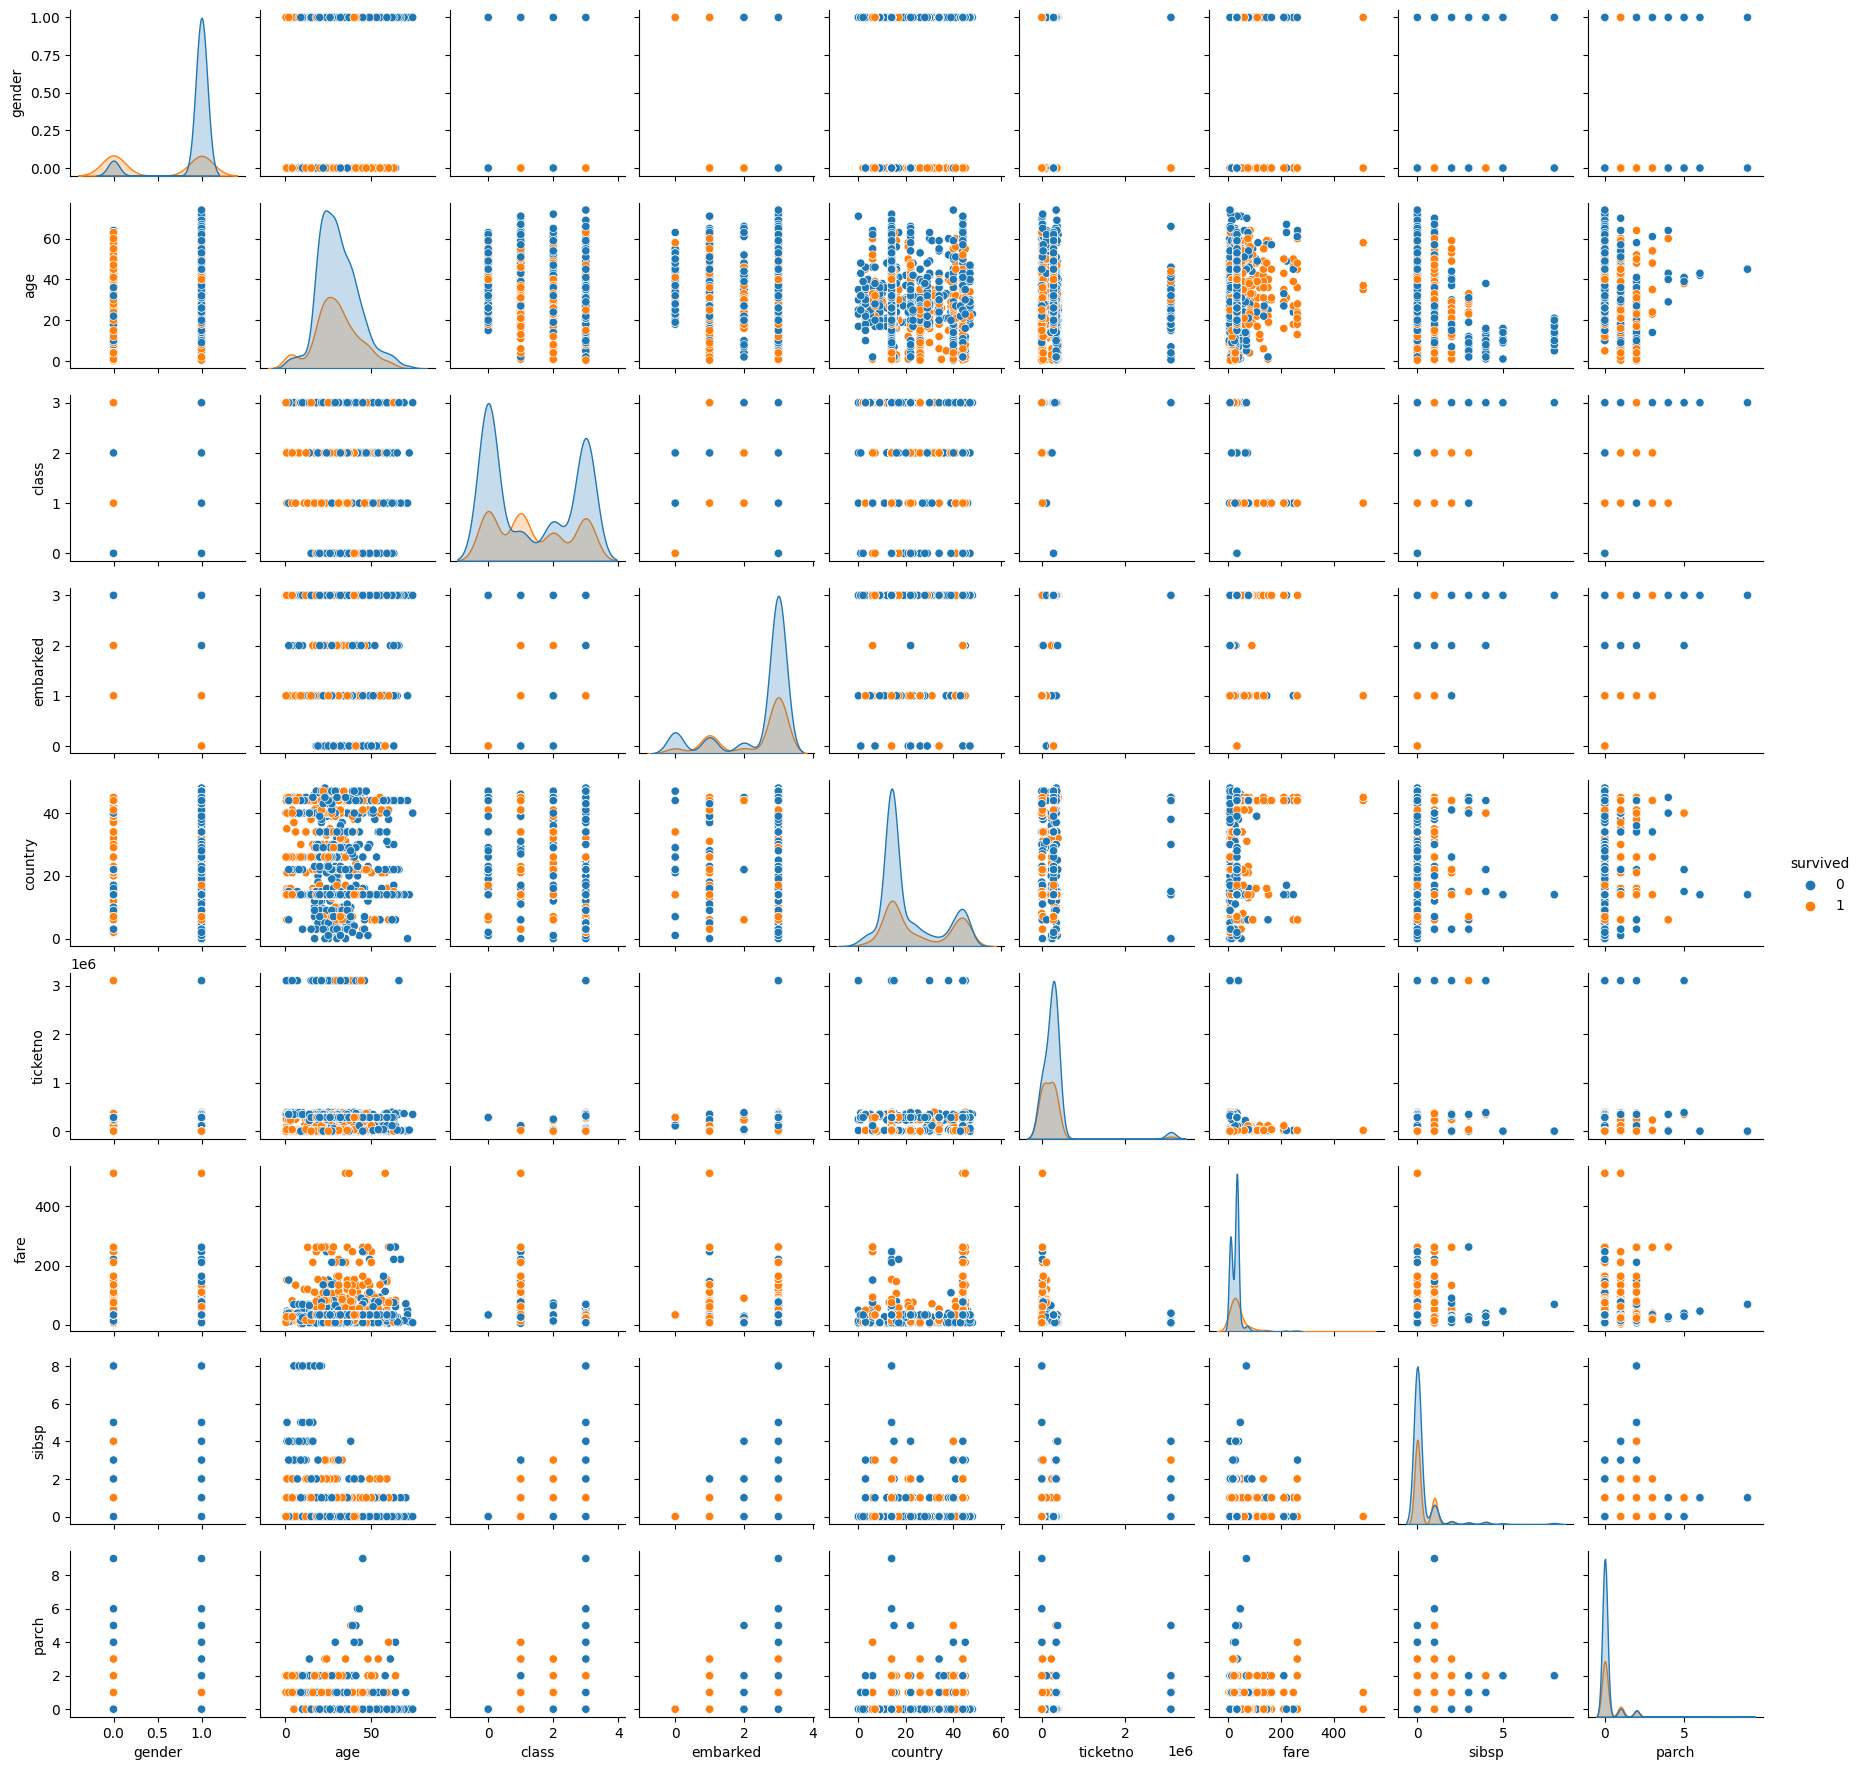

In [261]:
sns.pairplot(titanic2, hue = 'survived', height = 2)
plt.show()

Nu kommer mer feature selection/engineering! Jag slår ihop kategorierna till familj och delar upp target (X och y)

In [262]:
titanic2['family'] = titanic2['sibsp'] + titanic2['parch']
titanic2.drop(['sibsp', 'parch'], axis=1, inplace = True)

In [263]:
X = titanic2.drop('survived', axis = 1)
y = titanic2['survived']

In [264]:
X

,gender,age,class,embarked,country,ticketno,fare,family
0,1,42.0,3,3,44,5547.000000,7.11000,0.0
1,1,13.0,3,3,44,2673.000000,20.05000,2.0
2,1,16.0,3,3,44,2673.000000,20.05000,2.0
3,0,39.0,3,3,14,2673.000000,20.05000,2.0
4,0,16.0,3,3,30,348125.000000,7.13000,0.0
...,...,...,...,...,...,...,...,...
2202,1,41.0,0,0,14,284215.677052,33.40476,0.0
2203,1,40.0,0,3,14,284215.677052,33.40476,0.0
2204,1,32.0,0,3,14,284215.677052,33.40476,0.0
2205,1,20.0,0,3,14,284215.677052,33.40476,0.0


gender, age, country, och fare är viktiga, men överraskande nog inte class. även familjeförhållandena verkar oviktiga här. Intressant eftersom det är dessa jag har gjort stora ändringar i när jag fyllde upp null-värdena för besättningen tidigare, det kan ha eventuellt ha sett annorlunda ut om jag hade haft ett annat dataset med endast passagerarna

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

rfc = RandomForestClassifier(n_estimators = 100, random_state=0)
rfc.fit(X_train, y_train)

importance = rfc.feature_importances_

importance

array([0.23047842, 0.24060814, 0.04780205, 0.02348984, 0.0906236 ,
       0.18193655, 0.13597157, 0.04908983])

jag väljer ut de 4a viktigaste features

In [266]:
from sklearn.feature_selection import SelectFromModel

important = SelectFromModel(rfc,threshold = 0.1)
important.fit(X_train, y_train)
X_train_i = important.transform(X_train)
X_test_i = important.transform(X_test)

X_train_i innehåller nu 4 features: Gender, Age, ticketno och fare. (i:et står för important!)

In [267]:
X_train_i.shape


(1544, 4)

Dags att göra en första prediction, jag testar logistic regression.

In [268]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [269]:
logreg.fit(X_train_i, y_train)
y_pred = logreg.predict(X_test_i)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [270]:
logreg.score(X_test_i, y_test)

0.6953242835595776

Tyvärr ganska dåligt score! Nu ska jag testa att droppa crew, dvs majoriteten av raderna där jag ändrade null-värdena på mina features. Förhoppningsvis kommer detta leda till ett bättre score. jag gör alltså en ny dataframe som jag döper till passengers.

In [271]:
passengers = pd.DataFrame(titanic2)
passengers.drop(passengers[passengers['class']== 0].index, inplace = True)

In [272]:
passengers

,gender,age,class,embarked,country,ticketno,fare,survived,family
0,1,42.0,3,3,44,5547.0,7.1100,0,0.0
1,1,13.0,3,3,44,2673.0,20.0500,0,2.0
2,1,16.0,3,3,44,2673.0,20.0500,0,2.0
3,0,39.0,3,3,14,2673.0,20.0500,1,2.0
4,0,16.0,3,3,30,348125.0,7.1300,1,0.0
...,...,...,...,...,...,...,...,...,...
1314,0,24.0,2,3,16,248747.0,13.0000,0,0.0
1315,1,22.0,3,1,43,2656.0,7.0406,0,0.0
1316,1,27.0,3,1,43,2670.0,7.0406,0,0.0
1317,1,25.0,3,1,26,2620.0,7.0406,1,0.0


Vissa mindre ändringar nu i heatmappen nedan men fortfarande inget som korrelerar jättestarkt förutom gender.

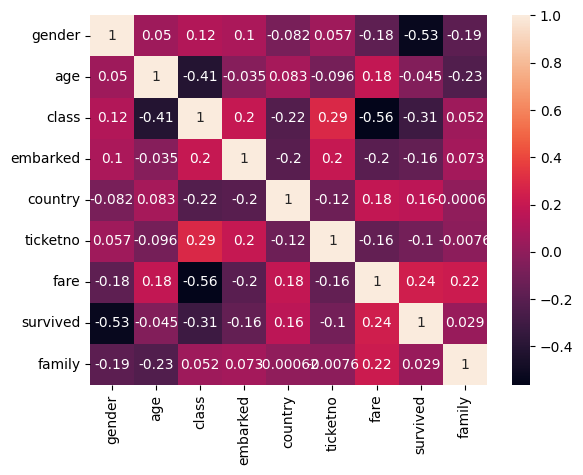

In [273]:
corr2 = passengers.corr(method='pearson')
sns.heatmap(corr2, annot=True)
plt.show()

Jag gör en ny RandomForestClassifier för att se vilken feature som är viktig bland passagerarna och jämför med hela titanic. siffrorna är visserligen lite ändrade, men det som är viktigt i första mätningen är fortfarande viktigt i andra mätningen. (jag lägger till ett p i variablerna som står för passengers)

In [274]:
Xp = passengers.drop('survived', axis = 1)
yp = passengers['survived']

Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size=0.3)
rfc.fit(Xp_train, yp_train)
importance_p = rfc.feature_importances_

In [275]:
print('Hela titanic: ', importance)

print('Endast passagerare: ', importance_p)

Hela titanic:  [0.23047842 0.24060814 0.04780205 0.02348984 0.0906236  0.18193655
 0.13597157 0.04908983]
Endast passagerare:  [0.23441619 0.17831855 0.06873247 0.02106763 0.07537527 0.21581223
 0.1531866  0.05309106]


In [276]:
important_p = SelectFromModel(rfc,threshold = 0.1)
important_p.fit(Xp_train, yp_train)
Xp_train_i = important_p.transform(Xp_train)
Xp_test_i = important_p.transform(Xp_test)

In [277]:
Xp_train_i.shape

(921, 4)

Jag väljer återigen ut viktigast features och testar en till logistic regression

In [278]:
logreg.fit(Xp_train_i, yp_train)
yp_pred = logreg.predict(Xp_test_i)
yp_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

tyvärr inte så högt score här heller. Dags att testa andra metoder!

In [279]:
logreg.score(Xp_test_i, yp_test)

0.5883838383838383

Här följer lite test med olika ensemble-metoder, först använder jag bagging med desicion tree. Om jag förstår bagging rätt så gör den
flera olika predictions (i detta fall, 10 olika med desiciontreeclassifier) på en mindre, slumvis utvald version av datasetet. Eftersom valet sker slumpvis så kan vissa delar av datasetet användas flera gånger men andra kanske aldrig används, därav skiljer sig resultatet varje gång jag kör denna ensemble. Den verkar i alla fall ge ett högre score än tidigare(logreg).

In [280]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()

bagging = BaggingClassifier(base_estimator= dtc, n_estimators=10)
booster = AdaBoostClassifier(base_estimator = dtc, n_estimators = 10)

bagging.fit(Xp_train_i, yp_train)
yp_pred = bagging.predict(Xp_test_i)

print('bagging score: ', accuracy_score(yp_test, yp_pred))

bagging score:  0.8005050505050505


Nu testar jag boosting, som också gör flera predictions precis som bagging men som för varje nytt test väljer de exempel som har presterat dåligt i det föregående testet för att försöka förbättra dessa. Det verkar ge ett sämre resultat än bagging i det här fallet.

In [281]:
booster = AdaBoostClassifier(base_estimator = dtc, n_estimators = 10)
booster.fit(Xp_train_i, yp_train)
yp_pred = booster.predict(Xp_test_i)
print('booster score: ', accuracy_score(yp_test, yp_pred))

booster score:  0.7575757575757576


Stacking använder olika modeller (knn, gauss, desicionTree i detta fall) som gör varsinn prediction. sen görs en slutlig prediction på dessa resultat (logreg). Även detta ger något lägre score än bagging

In [282]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

gauss = GaussianNB()
knn = KNeighborsClassifier()

estimators=[('knn', knn), ('gauss', gauss), ('dtc', dtc)]
stack = StackingClassifier(estimators = estimators, final_estimator=logreg, cv = 10)

stack.fit(Xp_train_i, yp_train)
yp_pred = stack.predict(Xp_test_i)
print('stack score: ', accuracy_score(yp_test, yp_pred))

stack score:  0.7550505050505051


Ungefär här kommer jag på att jag inte har använt scaling/normalization ännu!!

Detta kan ju påverka vilket score man får. Jag testar scaling och normalization för att se om det blir någon skillnad i score.

In [283]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

Xp

,gender,age,class,embarked,country,ticketno,fare,family
0,1,42.0,3,3,44,5547.0,7.1100,0.0
1,1,13.0,3,3,44,2673.0,20.0500,2.0
2,1,16.0,3,3,44,2673.0,20.0500,2.0
3,0,39.0,3,3,14,2673.0,20.0500,2.0
4,0,16.0,3,3,30,348125.0,7.1300,0.0
...,...,...,...,...,...,...,...,...
1314,0,24.0,2,3,16,248747.0,13.0000,0.0
1315,1,22.0,3,1,43,2656.0,7.0406,0.0
1316,1,27.0,3,1,43,2670.0,7.0406,0.0
1317,1,25.0,3,1,26,2620.0,7.0406,0.0


In [284]:
Xp_scaled = pd.DataFrame(scaler.fit_transform(Xp),columns=Xp.columns)

Xp_scaled

,gender,age,class,embarked,country,ticketno,fare,family
0,0.739994,0.894201,0.846491,0.627168,1.243630,-0.440241,-0.508706,-0.556121
1,0.739994,-1.201784,0.846491,0.627168,1.243630,-0.444781,-0.258365,0.709932
2,0.739994,-0.984958,0.846491,0.627168,1.243630,-0.444781,-0.258365,0.709932
3,-1.351362,0.677375,0.846491,0.627168,-0.884383,-0.444781,-0.258365,0.709932
4,-1.351362,-0.984958,0.846491,0.627168,0.250557,0.100964,-0.508320,-0.556121
...,...,...,...,...,...,...,...,...
1312,-1.351362,-0.406755,-0.349677,0.627168,-0.742515,-0.056033,-0.394757,-0.556121
1313,0.739994,-0.551306,0.846491,-1.760058,1.172696,-0.444808,-0.510049,-0.556121
1314,0.739994,-0.189929,0.846491,-1.760058,1.172696,-0.444786,-0.510049,-0.556121
1315,0.739994,-0.334480,0.846491,-1.760058,-0.033178,-0.444865,-0.510049,-0.556121


In [285]:
norm = MinMaxScaler()
Xp_norm = pd.DataFrame(norm.fit_transform(Xp),columns=Xp.columns)

Xp_norm

,gender,age,class,embarked,country,ticketno,fare,family
0,1.0,0.566591,1.0,1.000000,0.916667,0.001788,0.008014,0.0
1,1.0,0.173815,1.0,1.000000,0.916667,0.000861,0.033435,0.2
2,1.0,0.214447,1.0,1.000000,0.916667,0.000861,0.033435,0.2
3,0.0,0.525959,1.0,1.000000,0.291667,0.000861,0.033435,0.2
4,0.0,0.214447,1.0,1.000000,0.625000,0.112250,0.008054,0.0
...,...,...,...,...,...,...,...,...
1312,0.0,0.322799,0.5,1.000000,0.333333,0.080206,0.019585,0.0
1313,1.0,0.295711,1.0,0.333333,0.895833,0.000856,0.007878,0.0
1314,1.0,0.363431,1.0,0.333333,0.895833,0.000860,0.007878,0.0
1315,1.0,0.336343,1.0,0.333333,0.541667,0.000844,0.007878,0.0


Nu har jag gjort en version med scale och en version med normalization (fast jag upptäckte sedan att jag inte har fått med target-columnen). jag testar bagging med scaled, det gör inte så stor skillnad.

In [286]:
X_train, X_test, y_train, y_test = train_test_split(Xp_scaled, yp, test_size=0.3)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print('bagging score: ', accuracy_score(y_test, y_pred))

bagging score:  0.7626262626262627


In [287]:
X_train

,gender,age,class,embarked,country,ticketno,fare,family
251,-1.351362,-1.563160,-0.349677,0.627168,-0.884383,-0.398575,-0.142287,0.709932
334,0.739994,-0.912683,0.846491,0.627168,-1.168118,0.102713,-0.507524,-0.556121
339,-1.351362,0.315998,-1.545845,0.627168,1.243630,-0.395863,0.924085,0.709932
129,-1.351362,2.267432,-1.545845,0.627168,-0.884383,-0.269250,-0.141127,-0.556121
1021,-1.351362,0.966476,-1.545845,0.627168,1.243630,-0.410836,3.436990,0.076905
...,...,...,...,...,...,...,...,...
288,0.739994,-0.551306,-0.349677,-2.953670,0.179623,-0.070084,0.000000,-0.556121
1172,0.739994,-0.334480,0.846491,0.627168,-0.884383,0.170398,-0.510641,-0.556121
972,0.739994,-0.334480,0.846491,0.627168,0.959895,0.099307,-0.507921,0.076905
150,0.739994,-0.695857,-0.349677,0.627168,-0.742515,-0.053021,0.000000,-0.556121


Baggin med normalization ger lite bättre score

In [288]:
X_train, X_test, y_train, y_test = train_test_split(Xp_norm, yp, test_size=0.3)

bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

print('bagging score: ', accuracy_score(y_test, y_pred))

bagging score:  0.7828282828282829


MER TEST
eftersom jag kom på att jag missat att göra normalization på target så gör jag om detta nu (Vet inte om det har någon betydelse)

In [289]:
passengers_norm = pd.DataFrame(norm.fit_transform(passengers),columns=passengers.columns)
passengers_norm


,gender,age,class,embarked,country,ticketno,fare,survived,family
0,1.0,0.566591,1.0,1.000000,0.916667,0.001788,0.008014,0.0,0.0
1,1.0,0.173815,1.0,1.000000,0.916667,0.000861,0.033435,0.0,0.2
2,1.0,0.214447,1.0,1.000000,0.916667,0.000861,0.033435,0.0,0.2
3,0.0,0.525959,1.0,1.000000,0.291667,0.000861,0.033435,1.0,0.2
4,0.0,0.214447,1.0,1.000000,0.625000,0.112250,0.008054,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1312,0.0,0.322799,0.5,1.000000,0.333333,0.080206,0.019585,0.0,0.0
1313,1.0,0.295711,1.0,0.333333,0.895833,0.000856,0.007878,0.0,0.0
1314,1.0,0.363431,1.0,0.333333,0.895833,0.000860,0.007878,0.0,0.0
1315,1.0,0.336343,1.0,0.333333,0.541667,0.000844,0.007878,1.0,0.0


In [290]:
survived = passengers_norm['survived']
passengers_norm.drop(['survived'], axis=1, inplace=True)


en ny mätning på viktiga features efter normalization

In [297]:
X_train, X_test, y_train, y_test = train_test_split(passengers_norm, survived, test_size=0.3)
rfc.fit(X_train, y_train)

importance_norm = rfc.feature_importances_
importance_norm


array([0.24536345, 0.17843226, 0.0576169 , 0.02146028, 0.08466638,
       0.20174033, 0.15436296, 0.05635744])

In [298]:
important_norm = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold=0.1)
important_norm.fit(X_train, y_train)
X_train_i = important_norm.transform(X_train)
X_test_i = important_norm.transform(X_test)



Detta verkar vara det bästa score jag får, RandomForestclassifier med de fyra viktigaste normaliserade features från passagerarlistan. Det är alltså denna jag skulle välja att använda. Efter detta kommer cross validation och confusion-matrix.

In [299]:
rfc.fit(X_train_i, y_train)
y_pred = rfc.predict(X_test_i)
print(accuracy_score(y_test, y_pred))

0.8181818181818182


In [300]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, passengers_norm, survived, cv = 5)
print("Cross validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())


Cross validation scores:  [0.8219697  0.80681818 0.74524715 0.79467681 0.80988593]
Mean cross-validation score:  0.7957195529438875


In [301]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[224,  28],
       [ 44, 100]], dtype=int64)

C:\Users\fredd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


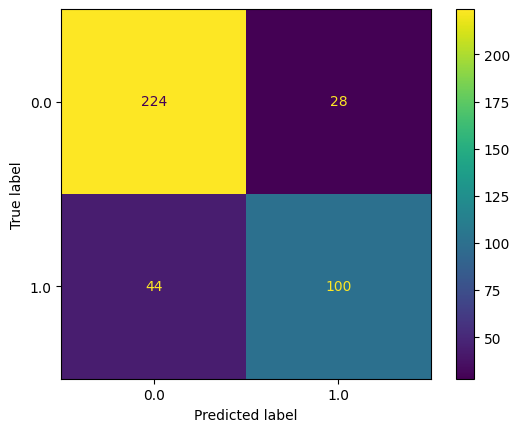

In [302]:
matrix = plot_confusion_matrix(rfc, X_test_i, y_test)

UTVÄRDERING och SUMMERING!

Jag har valt att arbeta med ett dataset från titanic, och försöka göra en predict på survival. jag kollade på lite olika varianter av datatsetet som fanns på kaggle men jag valde till slut ett där besättningen var inkluderad, eftersom detta var större och eftersom jag troligtvis behövde göra mer preprocessing (bra övning!).

Jag insåg senare att jag troligtvis påverkade datasetet negativt eftersom jag fyllde upp cirka 900 rader i flera kolumner med mean-värden. De kolumnerna som inte bestod av siffror gjorde jag till labels, 1,2,3 osv. Jag läste på om flera olika sätt som man kunde göra detta på, exempelvis one-hot encoding, men då skulle jag ha behövt utöka antalet kolumner väldigt mycket och det ville jag inte, så jag löste det med labels inom en och samma kolumn.

Det finns nog väldigt mycket som jag hade kunnat förbättra, jag hade exempelvis kunnat göra något med namn-kategorin om jag hade haft mer tid på mig (eventuellt NLP?) men min initiala bedömning var att den inte skulle tillföra så mycket eftersom exempelvis kön och ålder redan syntes i de andra kategorierna. Man hade å ena sidan kunnat tänka sig att någon med titeln "Sir" kanske skulle haft större chans att överleva, men jag vet samtidigt att flera av de rikaste passagerarna drunknade. Men hade jag "feature-engineerat" namnet så att det på något sätt blev mätbart så hade jag ju vetat med större säkerhet om det var relevant eller inte.

jag hade nog också kunnat gjort bedömningen från början att det inte var en bra idé att ta med besättningen, med tanke på att modellerna skulle göra predictions på features som biljettpris, rumsnummer, familj, osv. Men det var en lärdom och jag ville testa.

Gällande modellerna jag använde så skulle jag behöva läsa på lite mer om dessa för att veta exakt vad man kan göra för att påverka resultatet. I bagging och booster använder jag exempelvis descicion tree som estimator, man kanske hade kunnat använda något annat för att få ett bättre resultat? Samma sak med stacking, där kanske jag hade kunnat testa olika modeller att "stacka" och kanske använda något annat som final estimator, men eftersom jag inte direkt är expert på detta ännu så känns det bara som att jag skulle chansa, i stället för att göra ett medvetet beslut. 

Jag känner också att denna notebook blev lite väl rörig och att jag ibland gjorde saker i fel ordning. När man har lite mer vana så tror jag att man får in vanan gällande i vilken ordning man ska göra saker. Min ambition var att jag skulle göra alla stegen som stod i uppgiftsbeskrivningen i rätt ordning, men nu känns det som att jag har hoppat lite fram och tillbaka mellan stegen.

Hur som helst så är jag nöjd med resultatet, och även om vissa saker hade kunnat göras bättre så känns det faktiskt som att jag har lärt mig mycket.

AV

Fredrik Bergström